<a href="https://colab.research.google.com/github/Ivelina0/Dissertation_code/blob/main/Chapter_3_3D_plot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Create synthetic data function

def generate_data(n, rnd_seed, mu, gamma, alpha ):

    # fixing the randomness
    np.random.seed(rnd_seed)
    
    Lambda_ = np.zeros(n+1)
    
    # First lambda(0) = mu
    Lambda_[0] = mu ## adding the first lambda_k = mu

    # Delta_n and lambda_n empty lists
    Delta_n = np.zeros(n) ## adding a dummy data point    
    
    #Generating the lambda function and synthetic data
    for i in range(0,n):

        # draw from poisson distribution
        Delta_n[i] = np.random.poisson(Lambda_[i], size=1)

        # update lambda k+1
        Lambda_[i+1] = gamma*(Lambda_[i] - mu) + mu + alpha*Delta_n[i]
    
    return Lambda_, Delta_n

# Fig 2: 3D plot of parameters values with Negative log-likelihood hue

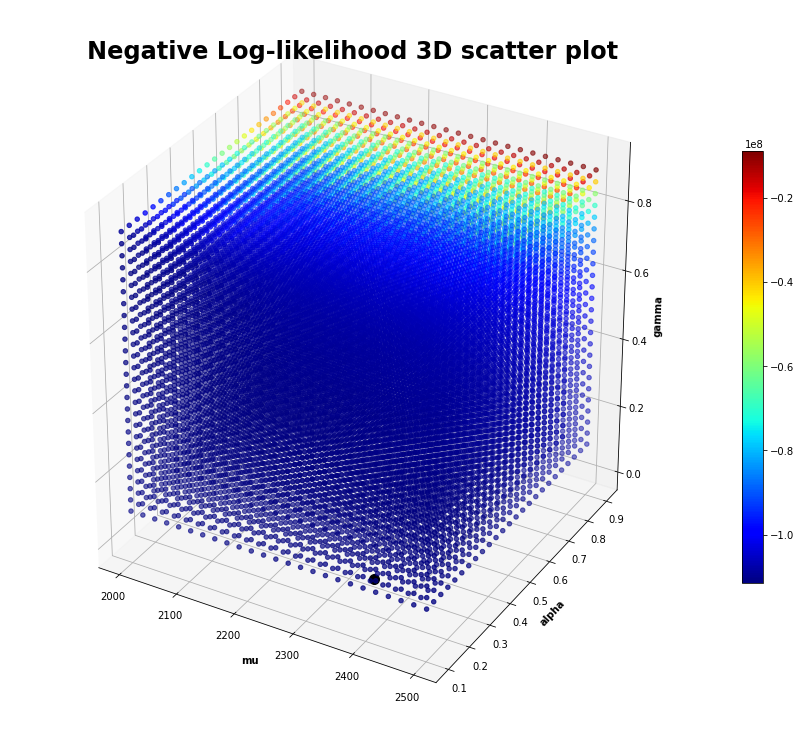

In [ ]:

################################################################
## Negative Log-likelihood with 5,000 data points
################################################################

## Generating Data 
n = 5000  ## samples
rnd_seed = 4

# Set the parameters
mu0 = 2360
gamma0 = 0.01
alpha0 = 0.25

Lambda_, data5000 = generate_data(n, rnd_seed, mu0, gamma0, alpha0)

## ------------------

## any number
mu = np.linspace(2000, 2500, 25)  
# infection rate larger than 0
alpha = np.linspace(0.1, 0.9, 25) 
# decay rate between 0 and 1
gamma = np.linspace(0.1, 0.9, 25)  

mm, aa, gg = np.meshgrid(mu, alpha, gamma)

## ------------------

## making an array for the lambdas 

l = mm.copy()

## copying the meshgrid shape for lambda estimates
# 0 - array for lambda estimate
lambda_est = l - l 

## ------------------

n = len(data5000)

l_list = [mm]  ## list for the element wise multiplication
# of the data points with each lambda estimate

## the first multiplication of the negative 
# log-likelihood

for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data5000[i]
    
    l_list.append(lambda_est)
    
## ------------------

## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data5000[i], np.log(l_list[i]))
    
    ll_list.append(vals)
    
## ------------------

## finding the negative log-likelihood function 
## by summing all 10 x 10 x 10 arrays for each
## multiplication and summing all 10x10x10 arrays 
## of just lambdas  

neg_log_like =  -sum(ll_list) + sum(l_list)

################################################################
## Initial/ Full  plot
################################################################

## Plot not in the dissertation main 

fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

# plot the actual parameter point on the figure
ax.scatter(mu0, alpha0, gamma0, c='black', s= 100)

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

#fig.savefig("3D_plot_initial_5000_data.png",transparent=True)

# Fig 3: 3D plot of the parameter values for the bottom 20% of the negative log-likelohood 

In [ ]:
# find the minimum value of the negative log likelihood 
Lmin = np.amin(neg_log_like)
Lmin 

-111433084.09769326

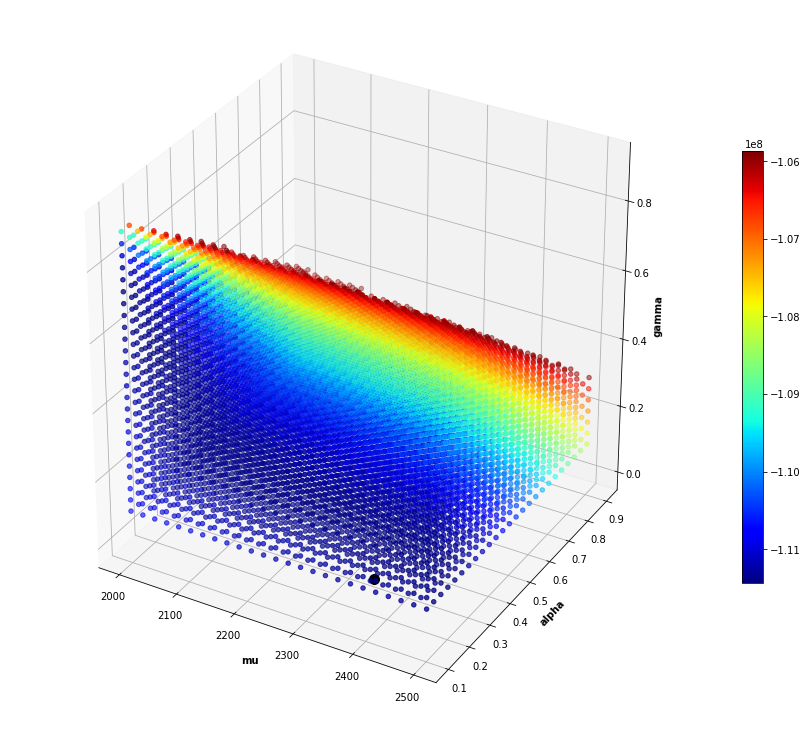

In [ ]:
################################################################
## Creating fig. 3.3a) 3D plot of the bottom 20% of the
# negative log-likelihood
################################################################

# create canvas 
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

# the 3D plot 
AX = ax.scatter3D(mm[neg_log_like < Lmin*0.95], 
    aa[neg_log_like < Lmin*0.95], 
    gg[neg_log_like < Lmin*0.95], 
    c = neg_log_like[neg_log_like < Lmin*0.95], 
    cmap='jet')

# plot the actual parameter point on the figure
ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) 

# label axis
ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

# add colour bar 
plt.colorbar(AX, ax = ax, shrink = 0.6) 

# save png
# fig.savefig("3D_plot_bottom_5perc_5000_data.png", transparent=True)

# Additional 3D plot - rotated

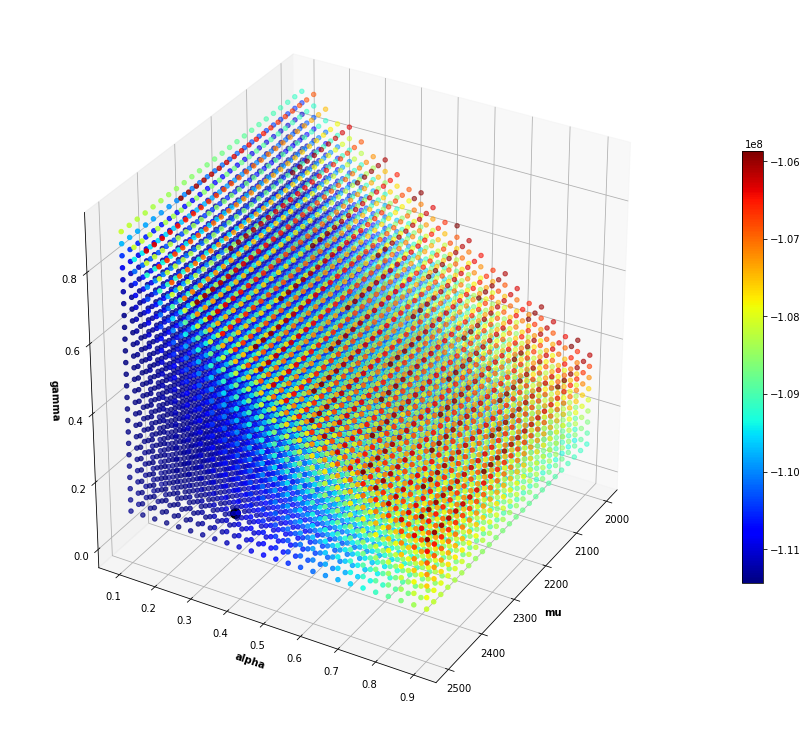

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*0.95], aa[neg_log_like < Lmin*0.95], gg[neg_log_like < Lmin*0.95], c = neg_log_like[neg_log_like < Lmin*0.95], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45
## plt.show()

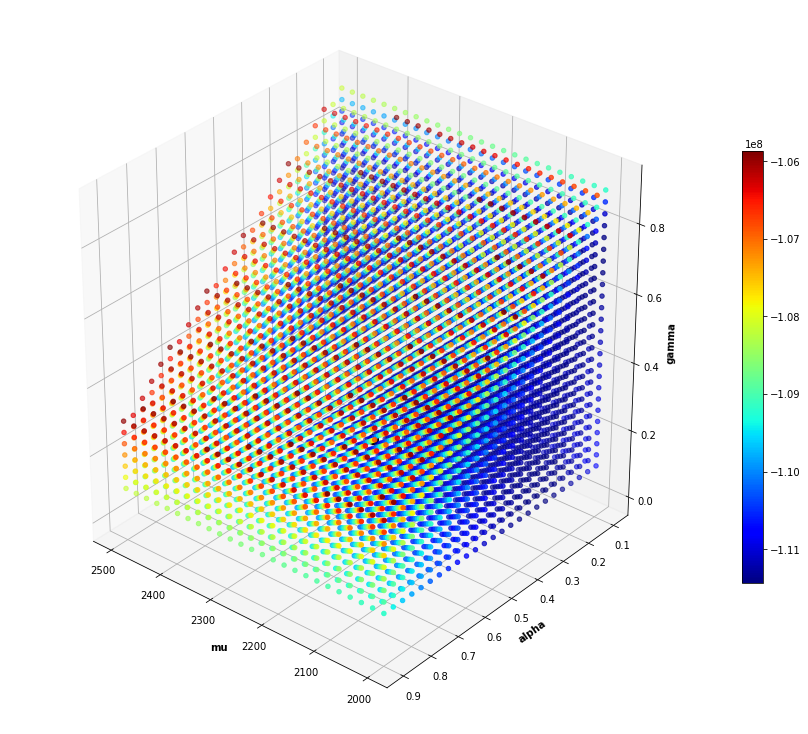

In [ ]:
################################################################
## Additional - rotated figure of 3D plot of the data for the
## bottom 20% of the negative log-likelihood 
################################################################

fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*0.95], 
    aa[neg_log_like < Lmin*0.95], 
    gg[neg_log_like < Lmin*0.95],
    c = neg_log_like[neg_log_like < Lmin*0.95], 
    cmap='jet')

# plot the actual parameter point on the figure
ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) 

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

# add colour bar 
plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 130
#ax.elev = -45

# fig.savefig("3D_plot_bottom_5perc_rotated_5000_data.png", transparent=True)

# PCA using Sckit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [ ]:
################################################################
## PCA using ScikitLearn on the bottom 5% of the Neg. log. likelihood  
################################################################

mm_min = mm[neg_log_like < Lmin*0.95]
aa_min = aa[neg_log_like < Lmin*0.95]
gg_min = gg[neg_log_like < Lmin*0.95]

neg_log_like_min = neg_log_like[neg_log_like < Lmin*0.95]

# stack the parameter arrays next to each other
two = np.vstack((mm_min, aa_min))#, axis=1)
all_param = np.vstack((two, gg_min))# , axis=1)

# transpose the parameters
all_param_transp = all_param.T

# standarise the data
x = StandardScaler().fit_transform(all_param_transp)

# Initialize the PCA class by passing the number
# of components =3 to the constructor
# PCA() here is an object 
pca = PCA(n_components=3)

# fit the data to the object
principalComponents = pca.fit_transform(x)

# Variances
print('PCA Variances are ',pca.explained_variance_)

PCA Variances are  [1.41276076 1.00185433 0.58567424]


In [ ]:
# Make dataframe that contains PCs 
components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=["mm_min","aa_min", "gg_min"])

# print the dataframe
components

PC1       PC2       PC3
mm_min -0.000679  0.997885 -0.064995
aa_min -0.707091 -0.046438 -0.705596
gg_min  0.707122 -0.045478 -0.705627

Axis 1 has strong positive loading for gamma, and negative loading for mu and alpha. 

Axis 2 has strong positive loading for mu, and negative one for alpha and gamma. 

Axis 3 has all negative loadings with the minimum one being the one for gamma.

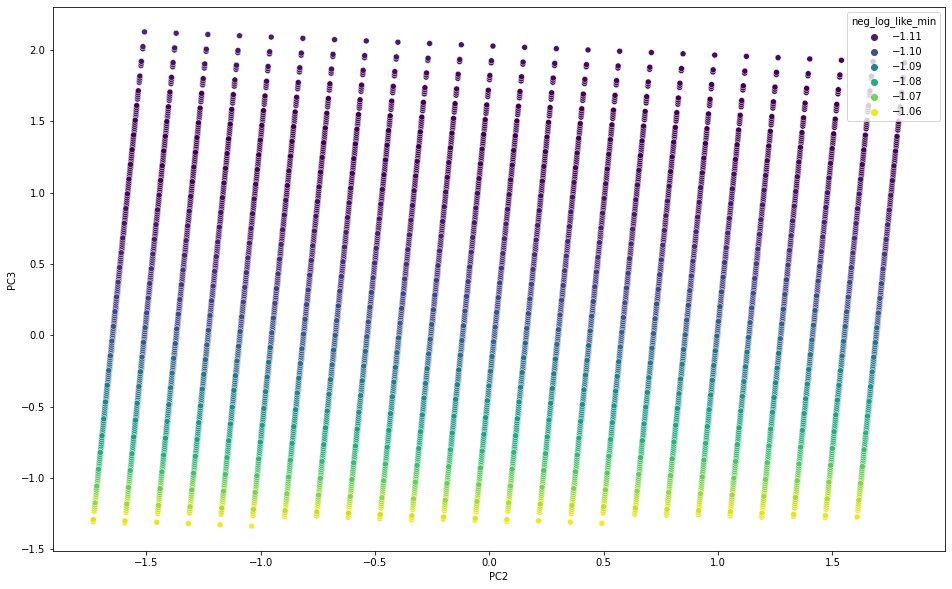

In [ ]:
##############################################
# Plot PCs against each other using the 
# seaborn's hue to find the optimal values 
##############################################

# make into a dataframe to use with the seaborn package 
# which is built using the matplotlib package

# make dataframes with principle components
princdf = pd.DataFrame(data = principalComponents,
        columns = ['PC1', 'PC2', 'PC3'])
        
# make a dataframe with the negative log-likelihood values
df_target = pd.DataFrame(data=neg_log_like_min,
        columns=["neg_log_like_min"])

# join the dataframes
finalDf = pd.concat([princdf, df_target], axis = 1)

# plot 1
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC2", y="PC3",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
)
# fig.savefig("PCA_components_pc2_3.png",transparent=True);

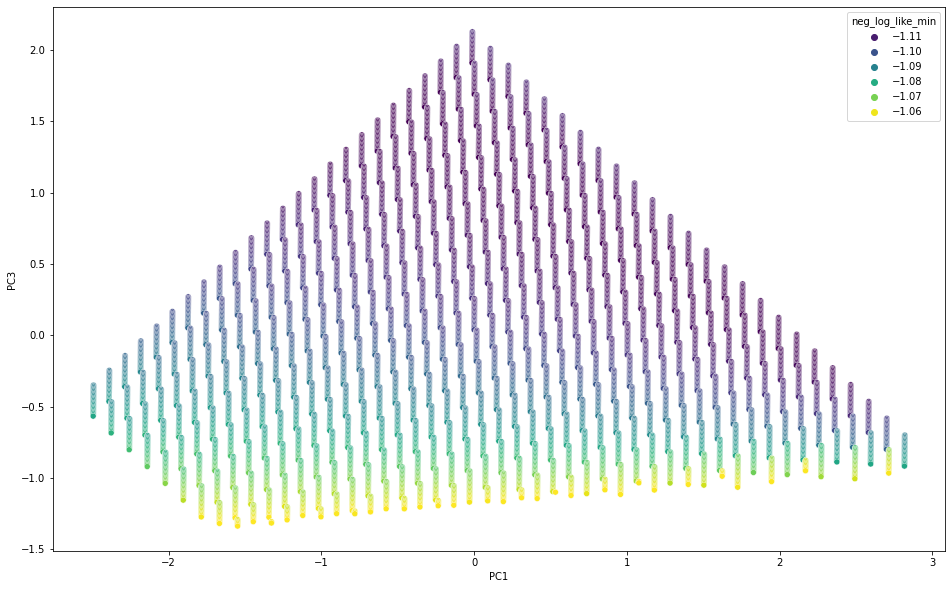

In [ ]:
# plot 2
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC3",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
)
# fig.savefig("PCA_components_pc1_3.png",transparent=True);


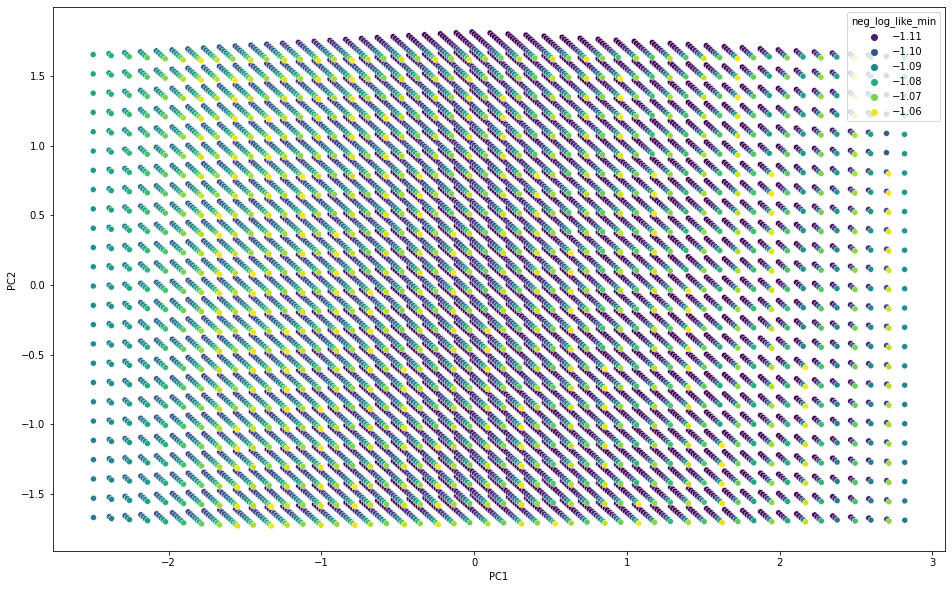

In [ ]:
# plot 3
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
)
# fig.savefig("PCA_components_pc1_2.png",transparent=True);

# PCA using NumPy

In [ ]:
################################################################
## PCA using NumPy on the bottom 5% of the Neg. log. likelihood  
################################################################

# Using the arrays from the Scikit-learn example:

# mm_min, aa_min, gg_min, neg_log_like_min 
# all_param

# find the number of valuess in the array
m = mm_min.shape[0] # 984
m

10370

In [ ]:
# Standardise the whole matrix/array
means = np.mean(all_param, axis=1).reshape(3,1)
M = means*np.ones((3,m))
std = np.std(all_param, axis=1).reshape(3,1)

x = (all_param - M)/std

# PCA using NumPy
u, s, vh = np.linalg.svd(x, full_matrices=False)
u.shape, s.shape, vh.shape

((3, 3), (3,), (3, 10370))

In [ ]:
# check the singular values
print(s)

[121.03270767 101.9226545   77.92853247]


In [ ]:
u

array([[-6.78830779e-04,  9.97885379e-01,  6.49946879e-02],
       [-7.07090920e-01, -4.64381957e-02,  7.05596149e-01],
       [ 7.07122317e-01, -4.54781732e-02,  7.05627214e-01]])

In [ ]:
# print the dataframe from the Scikit-Learn example
components

PC1       PC2       PC3
mm_min -0.000679  0.997885 -0.064995
aa_min -0.707091 -0.046438 -0.705596
gg_min  0.707122 -0.045478 -0.705627

In [ ]:
# the directions and weights are the same in both methods

## double checking the singular values by
# computing the e-values of the symmetric XX^t

C = np.dot(x, x.T)
eigen_vals, eigen_vecs = np.linalg.eig(C)

np.sqrt(eigen_vals)

# They are the same as the ones above

# The variances from Scikit-Learn are different to the ones from NumPy. 
# I will choose the NumPy variances to plot the Heatmap and Variance Barplot,
# since the manual eigenvalue calculation also agrees with the outcome. 

array([ 77.92853247, 101.9226545 , 121.03270767])

# Fig 5: PCA Heatmap

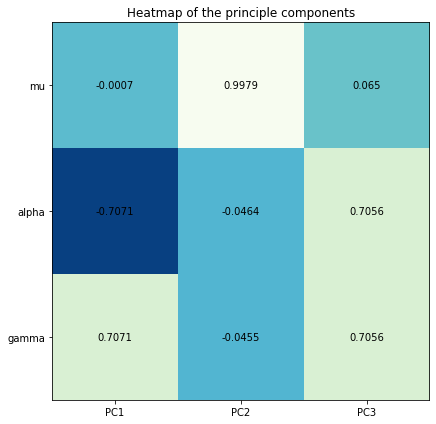

In [ ]:
## u is the data we want to plot

PC_labels = ["PC1", "PC2", "PC3"]

parm = ["mu", "alpha", "gamma" ]

fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(u, cmap='GnBu_r', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(PC_labels)))
ax.set_yticks(np.arange(len(parm)))

# ... and label them with the respective list entries
ax.set_xticklabels(PC_labels)
ax.set_yticklabels(parm);

# Loop over data dimensions and create text annotations.
for i in range(len(PC_labels)):
    for j in range(len(parm)):
        text = ax.text(j, i, np.round(u[i, j],4),
                       ha="center", va="center", color="black")
        
        
ax.set_title("Heatmap of the principle components")
fig.tight_layout()

# fig.savefig("HeatmapPCA.png",transparent=True);

# Fig 6: Singular values bar plot

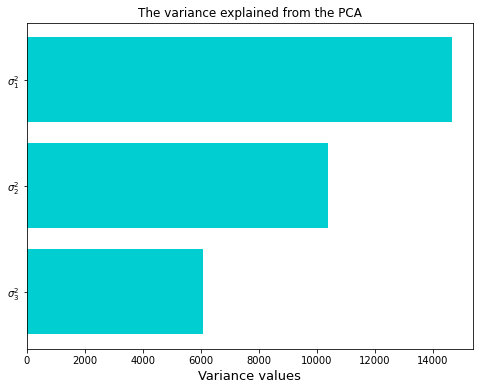

In [ ]:
# Get the variance from the singular values
variance = np.square(s)

# create plot
fig, ax = plt.subplots(figsize=(8,6))

# the labels using Latex
labs = ["$\sigma_1^2$", "$\sigma_2^2$", "$\sigma_3^2$"]

# barplot 
ax.barh(labs, variance, color = "darkturquoise")

ax.invert_yaxis()
ax.set_xlabel("Variance values", fontsize= 13)
plt.title("The variance explained from the PCA");

#fig.savefig("BarplotPCA.png",transparent=True);

In [ ]:
# Finding the total variance for one singular value
(variance[0]/ np.sum(variance))*100

47.087484172039005

In [ ]:
# Finding the total variance for two singular values
(np.sum(variance[:2])/ np.sum(variance))*100

80.47940799237755